## Введение

Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. 

## Описание данных

- <u>train.csv</u> -  информация (~20000) музыкальных треках, которые будут использоваться в качестве обучающих данных.
- <u>test.csv</u> -  информация (~5000) музыкальных треках, которые будут использоваться в качестве тестовых данных.
- <u>sample_submit.csv</u> - файл предсказаний в правильном формате.
- **instance_id**- идентификатор трека в тестовом наборе.
-  **music_genre** - Целевой признак. Для каждого трека предскажите категориальное значение соответствующее музыкальному жанру трека.

## Описание полей данных


- **instance_id** -Уникальный идентификатор трека
- **track_name** - Название трека
- **acousticness** - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.
- **danceability** - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.
- **duration_ms** - Продолжительность трека в миллисекундах.
- **energy** - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра
- **instrumentalness** - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала
key - базовый ключ (нота) произведения
- **liveness** - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую
- **loudness** - Общая громкость трека в децибелах (дБ)
- **mode** - Указывает на модальность (мажорную или минорную) трека
- **speechiness** - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
- **tempo** - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов
obtained_date - дата загрузки в сервис
- **valence** - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)
- **music_genre** - Музыкальный жанр трека

## Задачи

- **разработать  модель**, позволяющую классифицировать музыкальные произведения по жанрам.
- **предсказать значение** 'music_genre' для каждого трека из этого датасета для test.

## Импорт библиотек

In [1]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://packages.polyus.com/repository/pypi-proxy/simple


In [2]:
!pip install  -q phik
!pip install -U catboost
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://packages.polyus.com/repository/pypi-proxy/simple


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://packages.polyus.com/repository/pypi-proxy/simple


In [3]:
!pip install -q imblearn
!pip install ydata-profiling
!pip install -q category_encoders
!pip install torchmetrics
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


Looking in indexes: http://packages.polyus.com/repository/pypi-proxy/simple


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://packages.polyus.com/repository/pypi-proxy/simple


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://packages.polyus.com/repository/pypi-proxy/simple


In [4]:
!pip install feature-engine

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://packages.polyus.com/repository/pypi-proxy/simple


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import lightgbm as lgbm
import lightgbm as lgb
import optuna
import datetime as dt
import math
import time

#from adjdatatools.preprocessing import AdjustedScaler
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, OrdinalEncoder, PolynomialFeatures, RobustScaler
from sklearn.metrics import roc_auc_score, make_scorer, f1_score, roc_curve
from optuna.samplers import TPESampler
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures
RANDOM_STATE = 12345

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_imblearn_pipeline
from catboost import CatBoostRegressor,CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
import category_encoders as ce
from sklearn.linear_model import Ridge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings('ignore')

# Загрузка и анализ данных

In [6]:
# функция для предварительного знакомства с данными
def first_look(df, num_of_srtings=5):
    print('Общая информация')
    display(df.info())
    
    print(f'Первые {num_of_srtings} строк(и) данных')
    display(df.head(num_of_srtings))
    
    print('Основные статистические характеристики данных')
    display(df.describe())
    
    print('Количество пропусков:')
    print(df.isna().sum())
    print()   
    print('Количество явных дубликатов:', df.duplicated().sum())

In [7]:
# открываем файлы данных 
df_base = pd.read_csv("sample_submit.csv", index_col=0)
df_train = pd.read_csv("kaggle_music_genre_train.csv", index_col=0)
df_test = pd.read_csv("kaggle_music_genre_test.csv", index_col=0)

In [8]:
df_base

,music_genre
instance_id,
48564,Hip-Hop
72394,Alternative
88081,Rap
78331,Anime
72636,Anime
...,...
50532,Alternative
26255,Blues
67924,Electronic


In [9]:
first_look(df_base)

Общая информация
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5099 entries, 48564 to 47986
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   music_genre  5099 non-null   object
dtypes: object(1)
memory usage: 79.7+ KB


None

Первые 5 строк(и) данных


,music_genre
instance_id,
48564,Hip-Hop
72394,Alternative
88081,Rap
78331,Anime
72636,Anime


Основные статистические характеристики данных


,music_genre
count,5099
unique,10
top,Country
freq,532


Количество пропусков:
music_genre    0
dtype: int64

Количество явных дубликатов: 5089


In [10]:
first_look(df_train)

Общая информация
<class 'pandas.core.frame.DataFrame'>
Float64Index: 20394 entries, 25143.0 to 86375.0
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        20394 non-null  object 
 1   acousticness      20394 non-null  float64
 2   danceability      20394 non-null  float64
 3   duration_ms       20394 non-null  float64
 4   energy            20394 non-null  float64
 5   instrumentalness  20394 non-null  float64
 6   key               19659 non-null  object 
 7   liveness          20394 non-null  float64
 8   loudness          20394 non-null  float64
 9   mode              19888 non-null  object 
 10  speechiness       20394 non-null  float64
 11  tempo             19952 non-null  float64
 12  obtained_date     20394 non-null  object 
 13  valence           20394 non-null  float64
 14  music_genre       20394 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.5+ MB


None

Первые 5 строк(и) данных


,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
instance_id,,,,,,,,,,,,,,,
25143.0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
26091.0,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
87888.0,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
77021.0,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
20852.0,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative


Основные статистические характеристики данных


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,20394.000000,20394.000000,2.039400e+04,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,19952.000000,20394.000000
mean,0.274783,0.561983,2.203754e+05,0.625276,0.159989,0.198540,-8.552998,0.091352,120.942522,0.464588
std,0.321643,0.171898,1.267283e+05,0.251238,0.306503,0.166742,5.499917,0.097735,30.427590,0.243387
min,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000
25%,0.015200,0.451000,1.775170e+05,0.470000,0.000000,0.097300,-10.255750,0.035600,95.921750,0.272000
50%,0.120000,0.570000,2.195330e+05,0.666000,0.000144,0.130000,-7.052000,0.049050,120.012500,0.457000
75%,0.470000,0.683000,2.660000e+05,0.830000,0.084475,0.253000,-5.054000,0.095575,141.966250,0.653000
max,0.996000,0.978000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.041000,0.992000


Количество пропусков:
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 735
liveness              0
loudness              0
mode                506
speechiness           0
tempo               442
obtained_date         0
valence               0
music_genre           0
dtype: int64

Количество явных дубликатов: 1


В названии присутствуют символы и строчного и заглавного регистра, пропуски, проведем предобработку

In [11]:
df_train['track_name']=df_train['track_name'].str.lower()
df_test['track_name']=df_test['track_name'].str.lower()

In [12]:
df_train['track_name']=df_train['track_name'].str.strip()
df_test['track_name']=df_test['track_name'].str.strip()

In [13]:
first_look(df_train)

Общая информация
<class 'pandas.core.frame.DataFrame'>
Float64Index: 20394 entries, 25143.0 to 86375.0
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        20394 non-null  object 
 1   acousticness      20394 non-null  float64
 2   danceability      20394 non-null  float64
 3   duration_ms       20394 non-null  float64
 4   energy            20394 non-null  float64
 5   instrumentalness  20394 non-null  float64
 6   key               19659 non-null  object 
 7   liveness          20394 non-null  float64
 8   loudness          20394 non-null  float64
 9   mode              19888 non-null  object 
 10  speechiness       20394 non-null  float64
 11  tempo             19952 non-null  float64
 12  obtained_date     20394 non-null  object 
 13  valence           20394 non-null  float64
 14  music_genre       20394 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.5+ MB


None

Первые 5 строк(и) данных


,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
instance_id,,,,,,,,,,,,,,,
25143.0,highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
26091.0,toes across the floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
87888.0,first person on earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
77021.0,no te veo - digital single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
20852.0,chasing shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative


Основные статистические характеристики данных


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,20394.000000,20394.000000,2.039400e+04,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,19952.000000,20394.000000
mean,0.274783,0.561983,2.203754e+05,0.625276,0.159989,0.198540,-8.552998,0.091352,120.942522,0.464588
std,0.321643,0.171898,1.267283e+05,0.251238,0.306503,0.166742,5.499917,0.097735,30.427590,0.243387
min,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000
25%,0.015200,0.451000,1.775170e+05,0.470000,0.000000,0.097300,-10.255750,0.035600,95.921750,0.272000
50%,0.120000,0.570000,2.195330e+05,0.666000,0.000144,0.130000,-7.052000,0.049050,120.012500,0.457000
75%,0.470000,0.683000,2.660000e+05,0.830000,0.084475,0.253000,-5.054000,0.095575,141.966250,0.653000
max,0.996000,0.978000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.041000,0.992000


Количество пропусков:
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 735
liveness              0
loudness              0
mode                506
speechiness           0
tempo               442
obtained_date         0
valence               0
music_genre           0
dtype: int64

Количество явных дубликатов: 4


In [14]:
first_look(df_test)

Общая информация
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5099 entries, 48564 to 47986
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        5099 non-null   object 
 1   acousticness      5099 non-null   float64
 2   danceability      5099 non-null   float64
 3   duration_ms       5099 non-null   float64
 4   energy            5099 non-null   float64
 5   instrumentalness  5099 non-null   float64
 6   key               4941 non-null   object 
 7   liveness          5099 non-null   float64
 8   loudness          5099 non-null   float64
 9   mode              4950 non-null   object 
 10  speechiness       5099 non-null   float64
 11  tempo             4978 non-null   float64
 12  obtained_date     5099 non-null   object 
 13  valence           5099 non-null   float64
dtypes: float64(10), object(4)
memory usage: 597.5+ KB


None

Первые 5 строк(и) данных


,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
instance_id,,,,,,,,,,,,,,
48564,low class conspiracy,0.301000,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895
72394,the hunter,0.538000,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318
88081,hate me now,0.005830,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412
78331,somebody ain't you,0.020300,0.592,177354.0,0.749,0.00000,B,0.1220,-4.604,Major,0.0483,160.046,4-Apr,0.614
72636,sour mango,0.000335,0.421,-1.0,0.447,0.01480,D,0.0374,-8.833,Major,0.2020,73.830,4-Apr,0.121


Основные статистические характеристики данных


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,5099.000000,5099.000000,5.099000e+03,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,4978.000000,5099.000000
mean,0.276324,0.561888,2.173974e+05,0.622030,0.165198,0.197924,-8.630186,0.092718,121.246463,0.465593
std,0.322657,0.170502,1.156374e+05,0.251829,0.311940,0.166241,5.619766,0.100130,29.875950,0.244217
min,0.000002,0.059600,-1.000000e+00,0.001540,0.000000,0.020400,-46.122000,0.022600,37.114000,0.020500
25%,0.016600,0.451000,1.737335e+05,0.465000,0.000000,0.096950,-10.231000,0.035700,96.070250,0.272000
50%,0.120000,0.568000,2.175000e+05,0.660000,0.000157,0.129000,-7.135000,0.048700,120.053500,0.458000
75%,0.460000,0.681000,2.642470e+05,0.826000,0.092750,0.248000,-5.127000,0.096550,141.934250,0.650000
max,0.996000,0.977000,1.360027e+06,0.999000,0.994000,0.990000,1.949000,0.918000,216.029000,0.982000


Количество пропусков:
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 158
liveness              0
loudness              0
mode                149
speechiness           0
tempo               121
obtained_date         0
valence               0
dtype: int64

Количество явных дубликатов: 30


После предобработки выявлено большее количество явных дубликатов

In [15]:
df_train['track_name']

instance_id
25143.0                    highwayman
26091.0         toes across the floor
87888.0         first person on earth
77021.0    no te veo - digital single
20852.0               chasing shadows
                      ...            
47396.0                        o pato
44799.0                mt. washington
33350.0            original prankster
77920.0                         4peat
86375.0     trouble (feat. mc spyder)
Name: track_name, Length: 20394, dtype: object

In [16]:
print('Жанры музыки, присутствующие в базе данных:', df_base['music_genre'].unique())

Жанры музыки, присутствующие в базе данных: ['Hip-Hop' 'Alternative' 'Rap' 'Anime' 'Jazz' 'Rock' 'Electronic'
 'Country' 'Classical' 'Blues']


In [17]:
# удалим явные дубликаты из обучающей выборки
df_train=df_train.drop_duplicates()

In [18]:
# удалим явные дубликаты из тестовой выборки
df_test=df_test.drop_duplicates()

### Исследование корреляционной зависимости 

interval columns not set, guessing: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


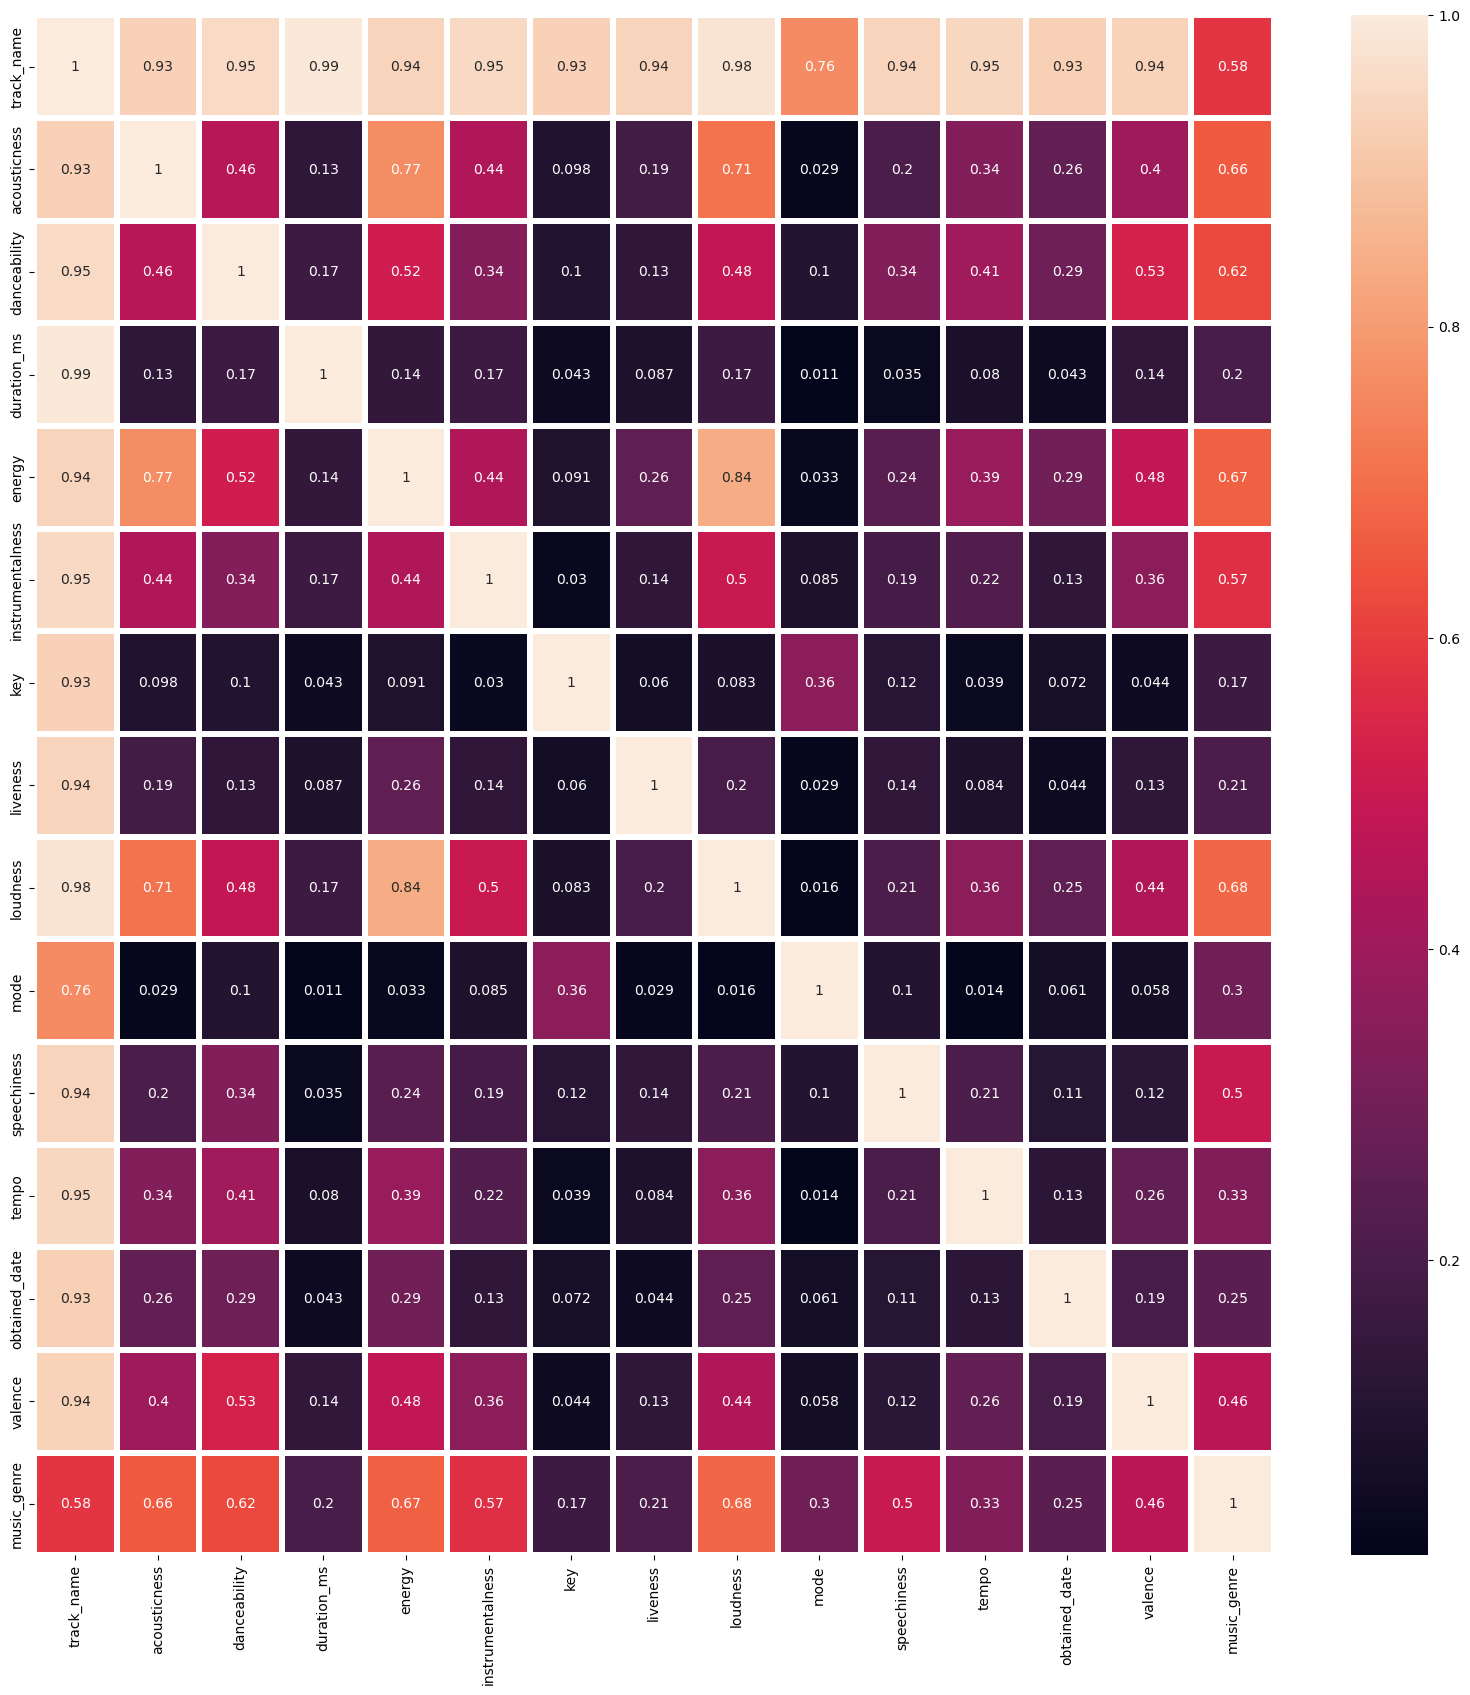

In [19]:
plt.rcParams['figure.figsize'] = (20.0, 20.0)
sns.heatmap(df_train.phik_matrix(), annot=True, linewidths=3, linecolor='white')
plt.show();

Низкая корреляция столбца music_genre  со столбцами 'obtained_date', 'liveness', 'key', 'duration_ms', 'mode', что на самом деле логично, т.к. жанр трека не зависит ни даты от добавления, наличия признаков живых инструментов и длительности, столбцы 'obtained_date', 'duration_ms', будут удалены для обучения модели. И тональность музыки так же зависит  от возможностей исполнителя, и музыкальное произведение может транспонироваться в зависимости от внешних условий, а не от жанра. Имя трека уникально для всех позиций, так же удалим этот столбец для стандартизации исследования.

In [20]:
#удалим не информативные столбцы из тестовой выборки
df_test=df_test.drop(['obtained_date','duration_ms','track_name'], axis=1)

In [21]:
df_train=df_train.drop(['obtained_date','duration_ms','track_name'], axis=1)

**Вывод:**
- в датафрейме трайн по 20 394 строк;
- пропуски в данных присутствуют в столбцах key, mode, tempo;
- типы данных не требуют замены;
- удалили  явные дубликаты;
- в данных присутствуют столбцы 'obtained_date', 'duration_ms', которые не несут ценности для обучения модели, т.к. не могут определять или косвенно характеризовать жанр музыки (столбцы удалены).

### Исследование факторов в тестовой и тренировочной выборках

### Исследование баланса классов

In [22]:
df_train['music_genre'].value_counts(normalize=True)

Blues          0.140118
Alternative    0.127563
Electronic     0.125650
Rap            0.119029
Rock           0.106179
Country        0.103973
Anime          0.093232
Classical      0.067337
Jazz           0.060765
Hip-Hop        0.056155
Name: music_genre, dtype: float64

В исходной выборке не наблюдается сильного дисбаланса в пользу какого-либо музыкального жанра, в целом классы по жанрам составляют от 5% до 14%.

####  Мера уверенности, что трек является акустическим - acousticness  

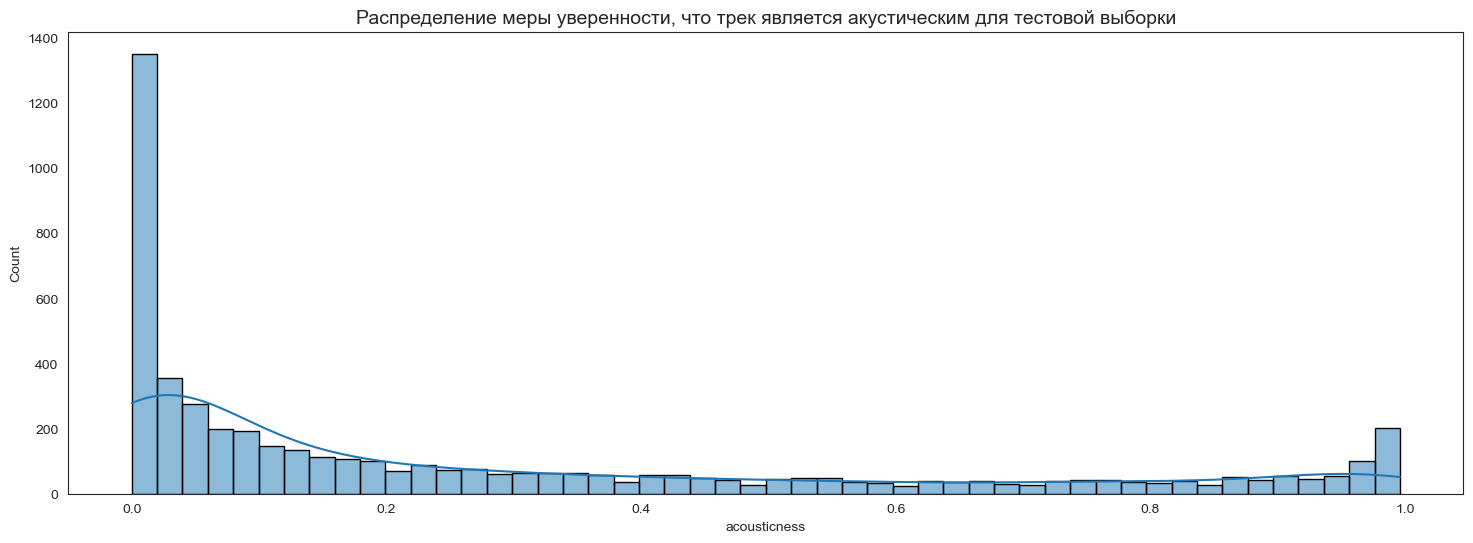

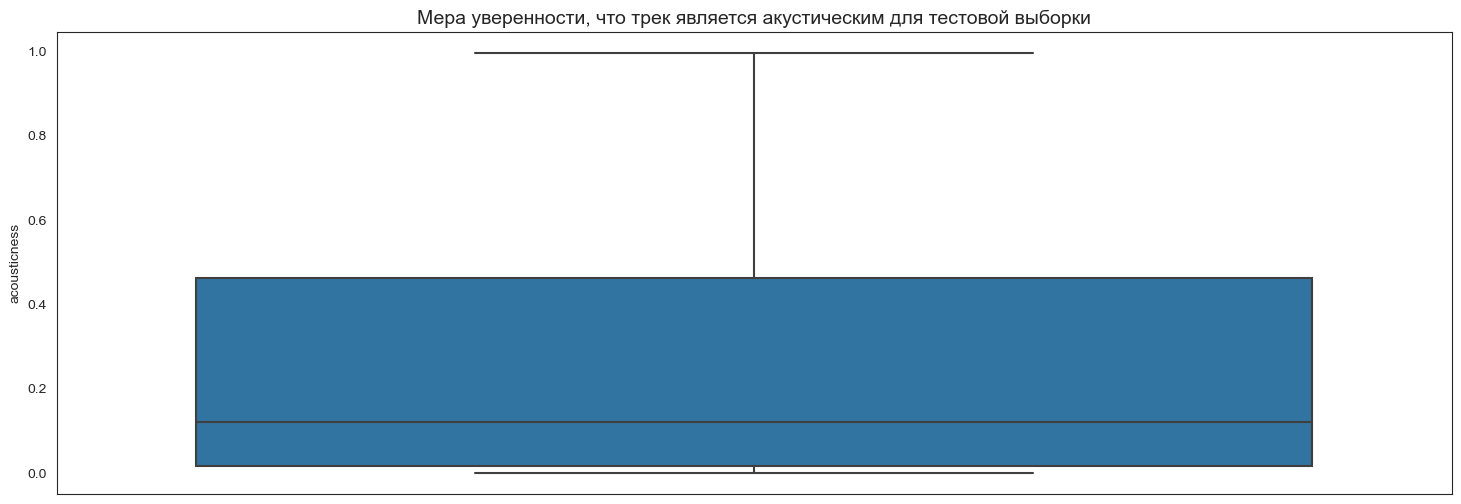

In [23]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(data=df_test,x='acousticness', kde=True,bins=50, edgecolor='black', ax=ax)
plt.title('Распределение меры уверенности, что трек является акустическим для тестовой выборки', fontsize='14')
plt.show()

fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(data=df_test,y='acousticness', ax=ax)
plt.title('Мера уверенности, что трек является акустическим для тестовой выборки', fontsize='14')
plt.show()

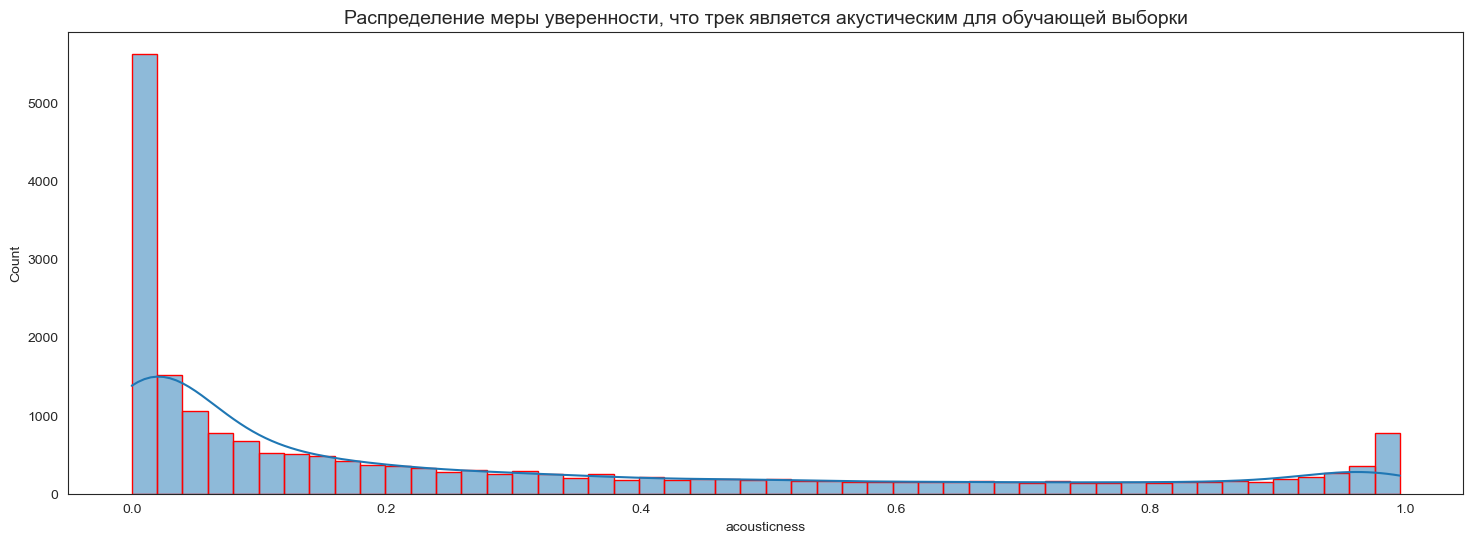

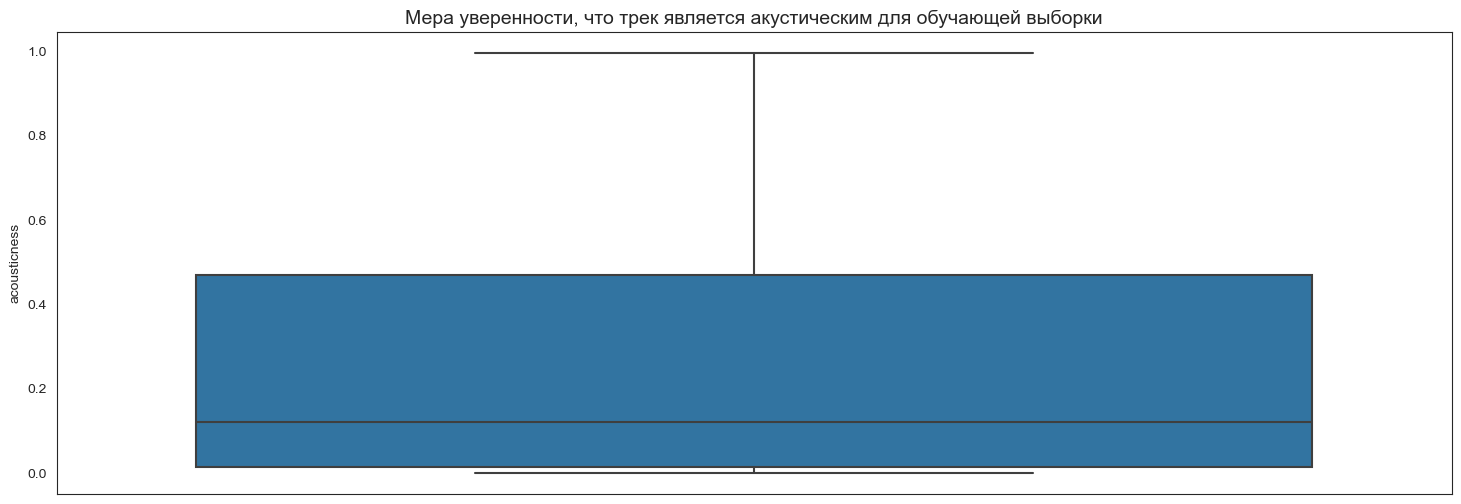

In [24]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(data=df_train,x='acousticness', kde=True,bins=50, edgecolor='red', ax=ax)
plt.title('Распределение меры уверенности, что трек является акустическим для обучающей выборки', fontsize='14')
plt.show()

fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(data=df_train,y='acousticness', ax=ax)
plt.title('Мера уверенности, что трек является акустическим для обучающей выборки', fontsize='14')
plt.show()

 В данных нет выбивающихся значений, лежащих за границами усов диаграммы размаха.

####  Мера уверенности, что трек является акустическим - acousticness  

Tанцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.

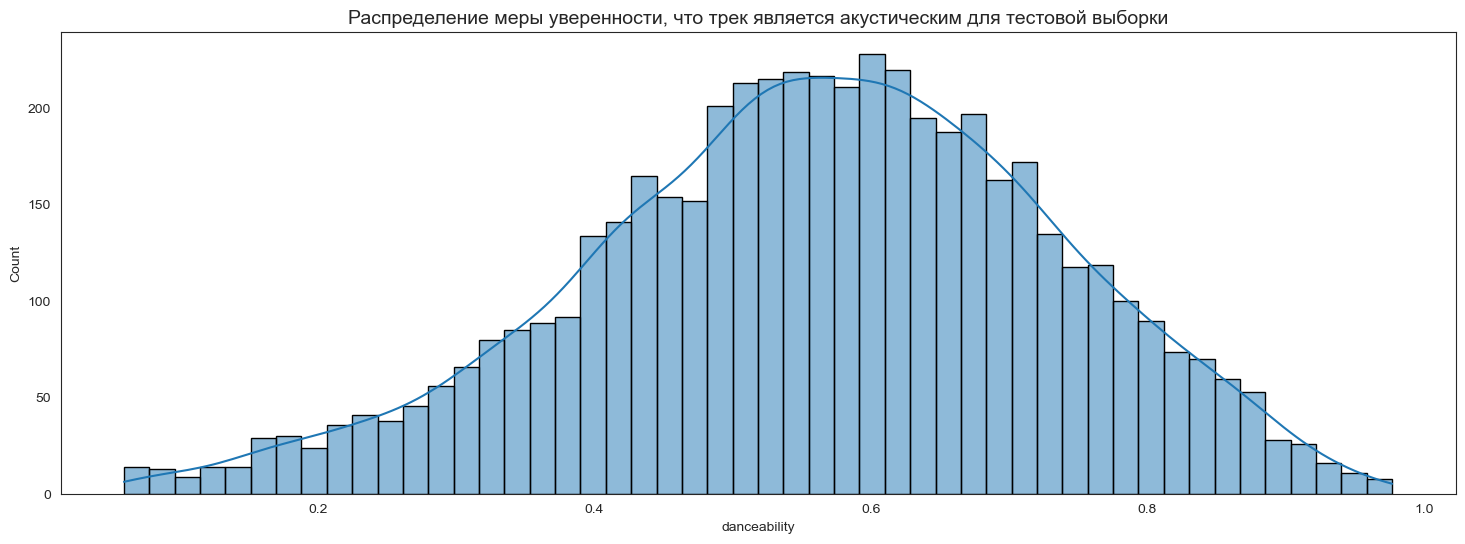

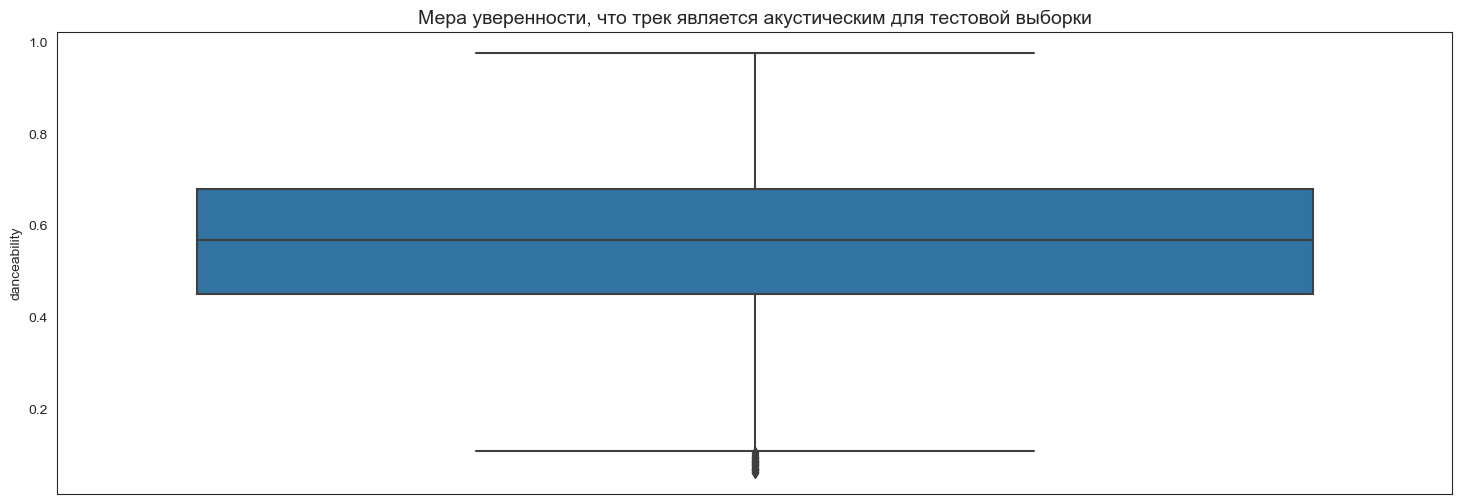

In [25]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(data=df_test,x='danceability', kde=True,bins=50, edgecolor='black', ax=ax)
plt.title('Распределение меры уверенности, что трек является акустическим для тестовой выборки', fontsize='14')
plt.show()

fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(data=df_test,y='danceability', ax=ax)
plt.title('Мера уверенности, что трек является акустическим для тестовой выборки', fontsize='14')
plt.show()

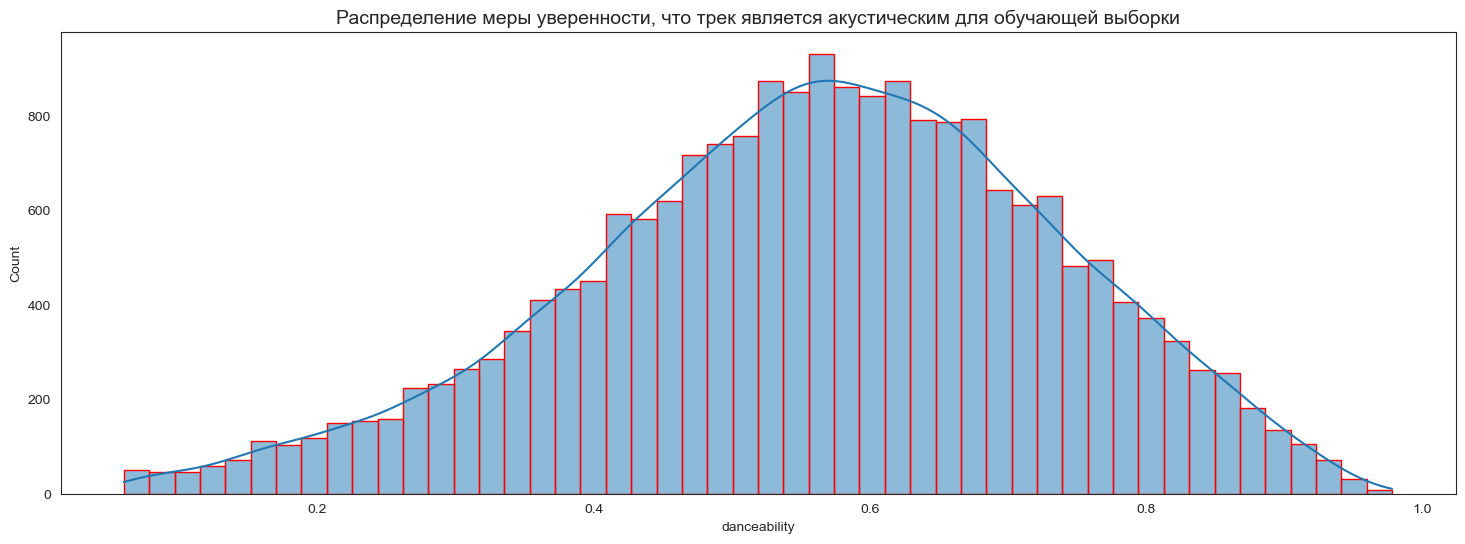

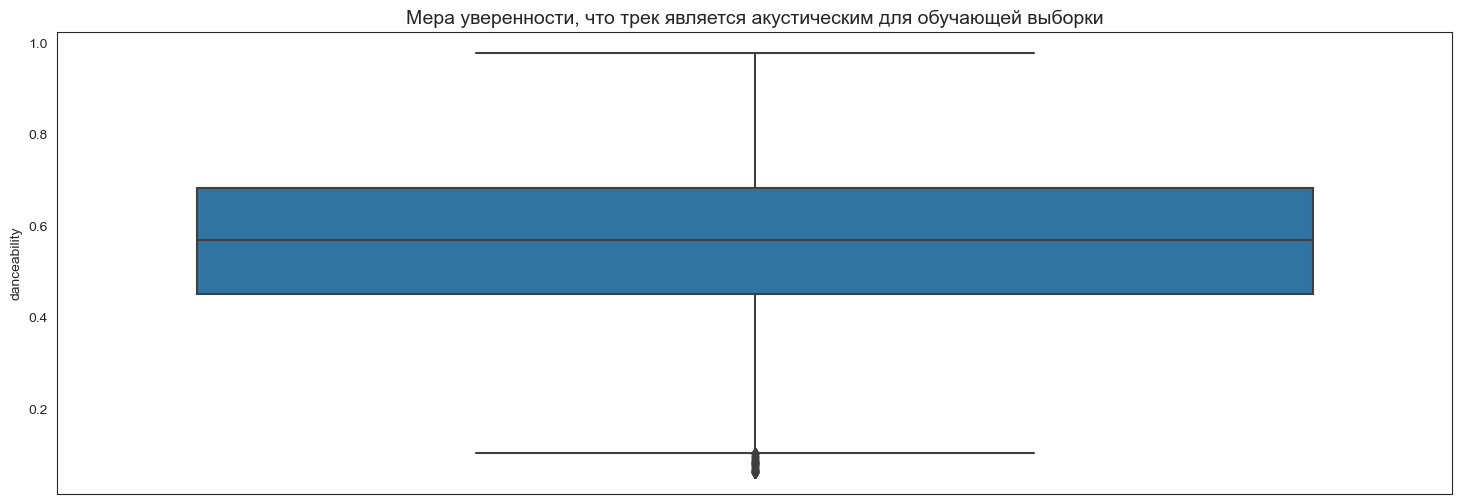

In [26]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(data=df_train,x='danceability', kde=True,bins=50, edgecolor='red', ax=ax)
plt.title('Распределение меры уверенности, что трек является акустическим для обучающей выборки', fontsize='14')
plt.show()

fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(data=df_train,y='danceability', ax=ax)
plt.title('Мера уверенности, что трек является акустическим для обучающей выборки', fontsize='14')
plt.show()

In [27]:
df_train.groupby('music_genre')['danceability'].mean()

music_genre
Alternative    0.546601
Anime          0.470696
Blues          0.526527
Classical      0.303564
Country        0.578900
Electronic     0.618739
Hip-Hop        0.718507
Jazz           0.582156
Rap            0.700351
Rock           0.538236
Name: danceability, dtype: float64

 В данных нет выбивающихся значений, лежащих за границами усов диаграммы размаха. Все значения лежат в пределах обозначенного диапазона. Наиболее танцевальная музыка - hip-hop, rap и electronic

####  Показатель энергичности композиции (energy)

Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра

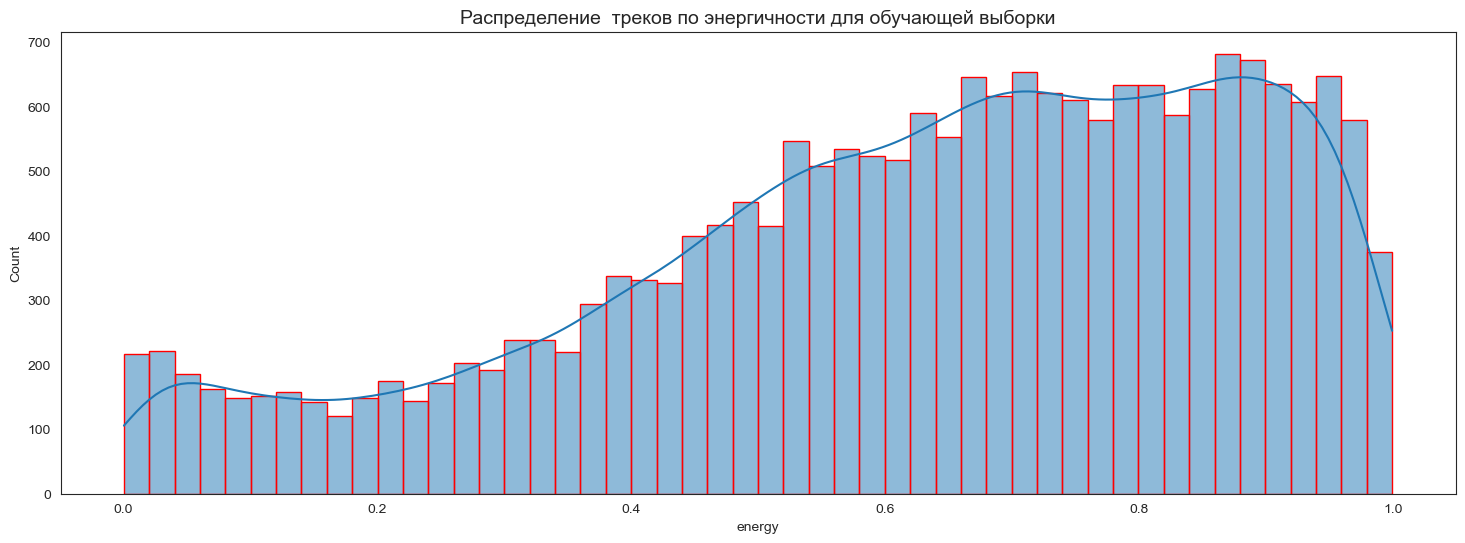

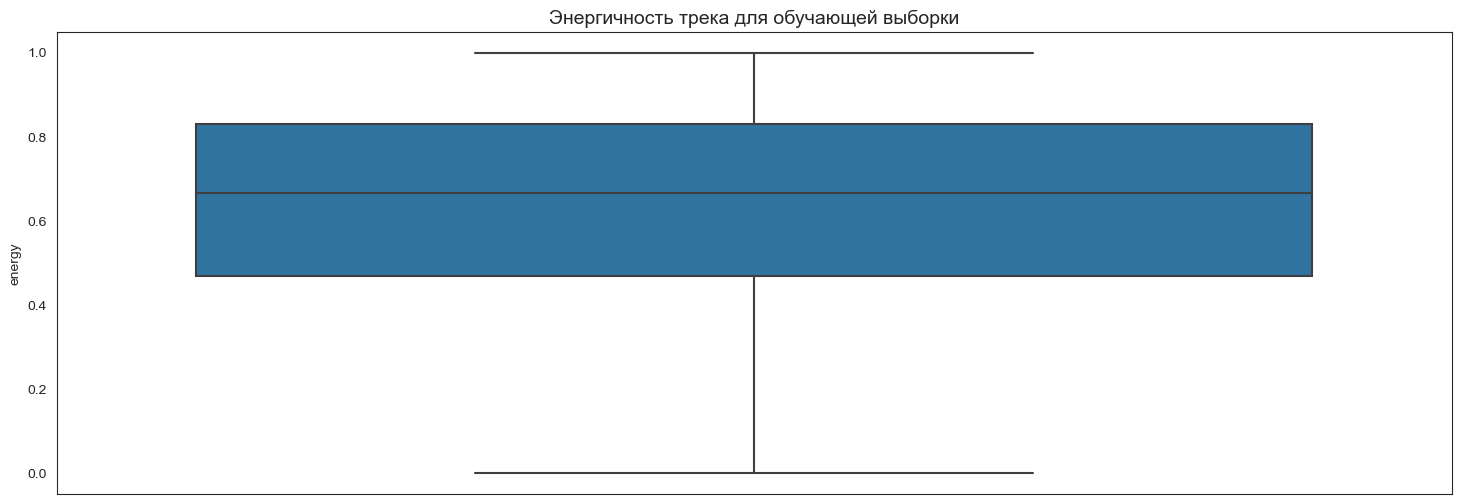

In [28]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(data=df_train,x='energy', kde=True,bins=50, edgecolor='red', ax=ax)
plt.title('Распределение  треков по энергичности для обучающей выборки', fontsize='14')
plt.show()

fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(data=df_train,y='energy', ax=ax)
plt.title('Энергичность трека для обучающей выборки', fontsize='14')
plt.show()

In [29]:
df_train.groupby('music_genre')['energy'].mean()

music_genre
Alternative    0.709921
Anime          0.675377
Blues          0.614047
Classical      0.174565
Country        0.636092
Electronic     0.738077
Hip-Hop        0.644582
Jazz           0.471680
Rap            0.652081
Rock           0.683546
Name: energy, dtype: float64

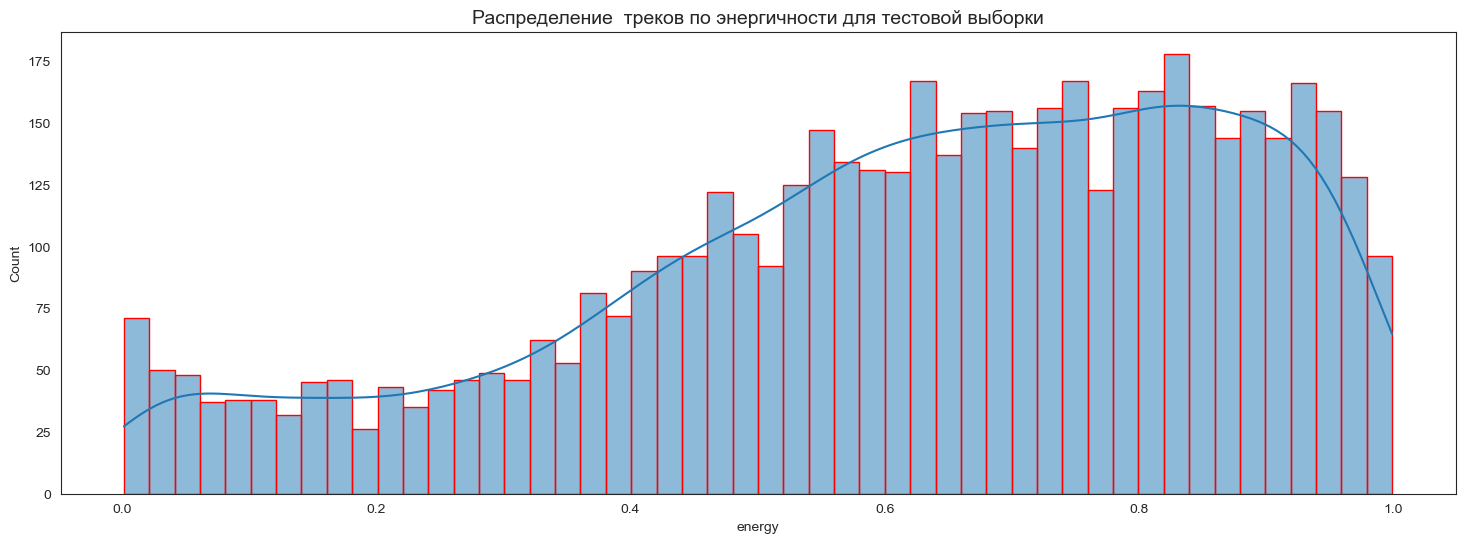

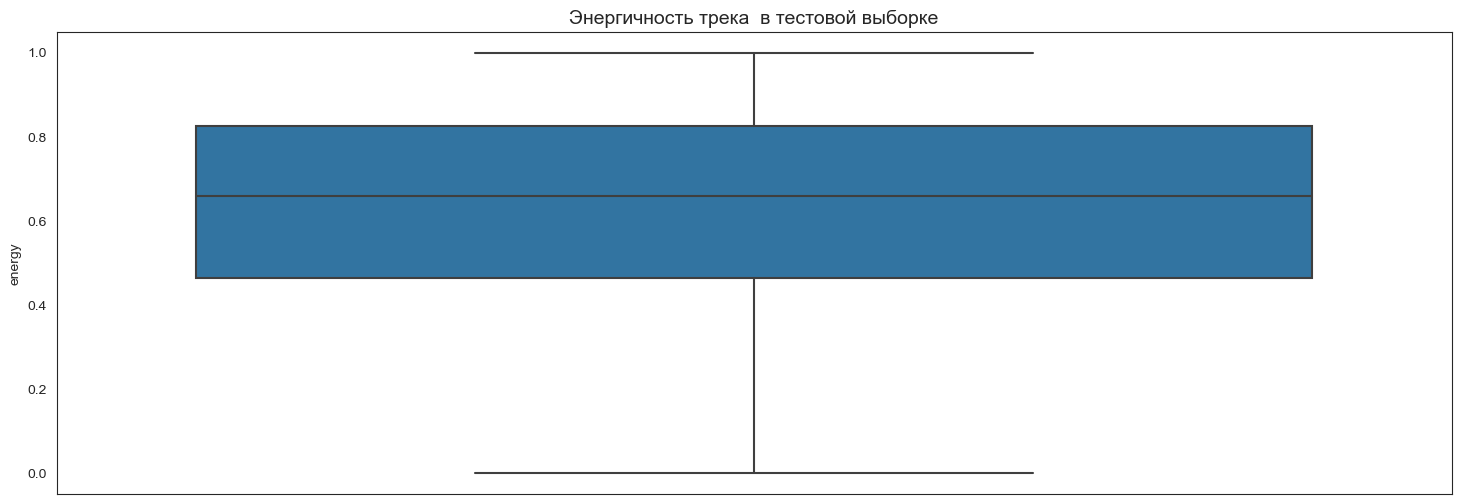

In [30]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(data=df_test,x='energy', kde=True,bins=50, edgecolor='red', ax=ax)
plt.title('Распределение  треков по энергичности для тестовой выборки', fontsize='14')
plt.show()

fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(data=df_test,y='energy', ax=ax)
plt.title('Энергичность трека  в тестовой выборке', fontsize='14')
plt.show()

 В данных нет выбивающихся значений, лежащих за границами усов диаграммы размаха. Все значения лежат в пределах обозначенного диапазона от 0 до 1. Наиболее энергетически заряженная музыка - hip-hop, rap и electronic, наблюдения аналогичны столбцу танцевальности, наиболее спокойная и менее заряженная классическая музыка.

####  Общая громкость трека в децибелах (дБ )(loudness)

loudness - Общая громкость трека в децибелах (дБ)

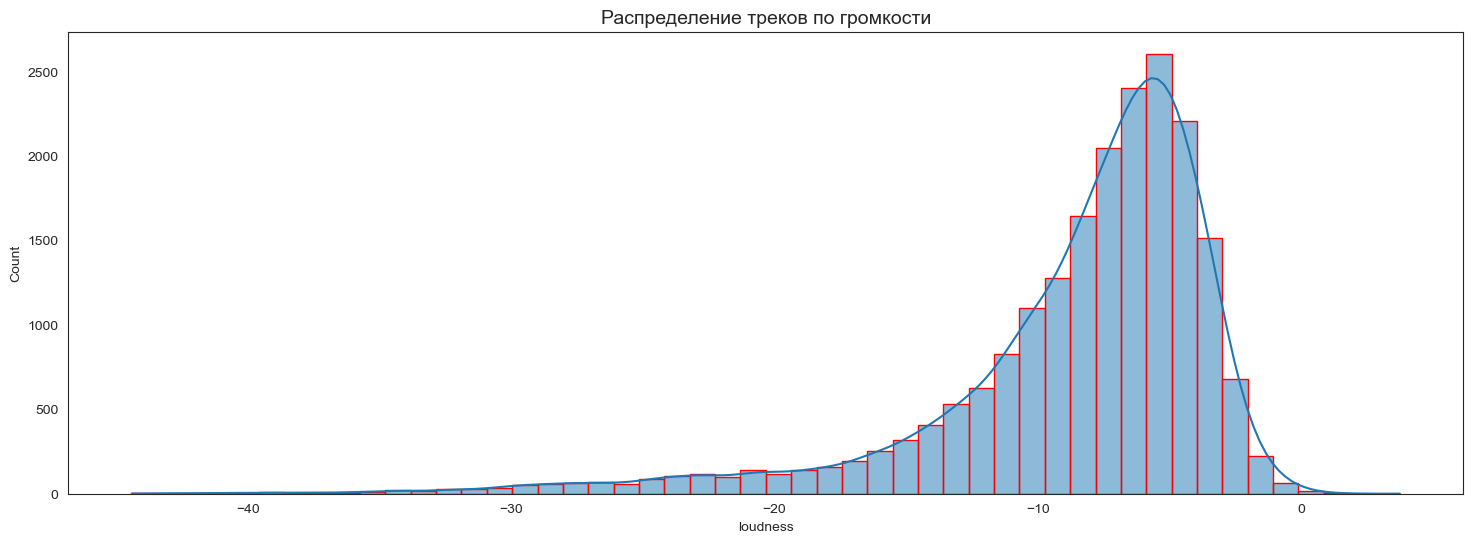

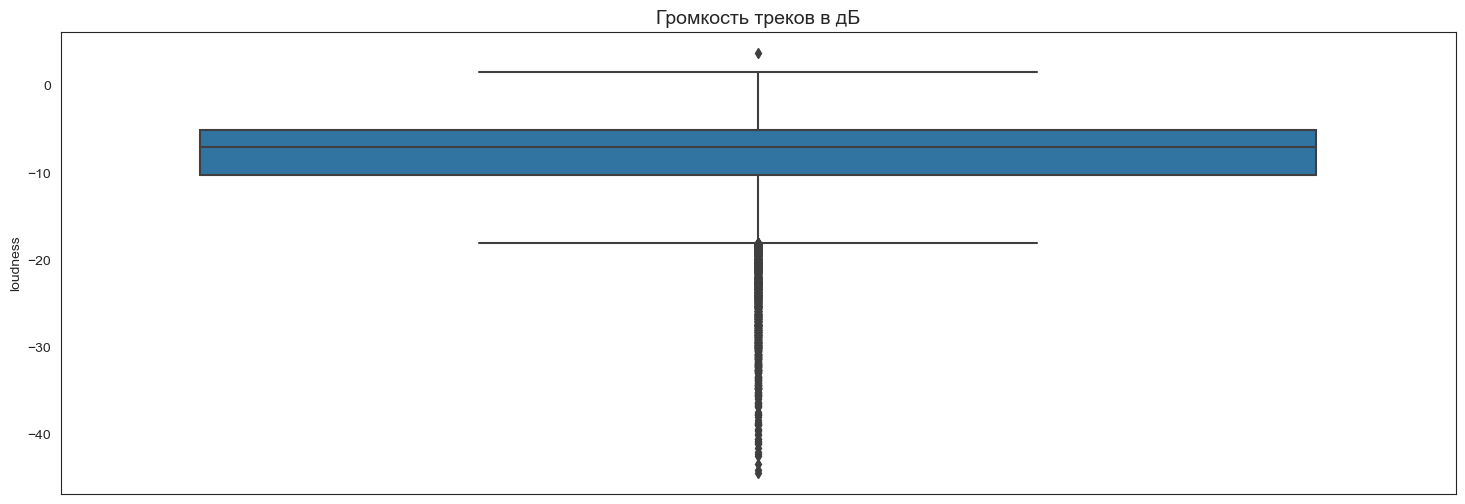

In [31]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(data=df_train,x='loudness', kde=True,bins=50, edgecolor='red', ax=ax)
plt.title('Распределение треков по громкости', fontsize='14')
plt.show()

fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(data=df_train,y='loudness', ax=ax)
plt.title('Громкость треков в дБ', fontsize='14')
plt.show()

Удалим треки с громкостью менее -25, для сглаживания выбросов c экстремально большими значениями, тем более таких точек менее 1% 

In [32]:
df_train.query('loudness<-25').shape[0]

495

In [33]:
df_train = df_train.query('loudness>-25')

Удалим треки с громкостью более 0, для сглаживания выбросов c экстремально большими значениями, тем более таких точек менее 1% 

In [34]:
df_train.query('loudness>0').shape[0]

17

In [35]:
df_train = df_train.query('loudness<0')

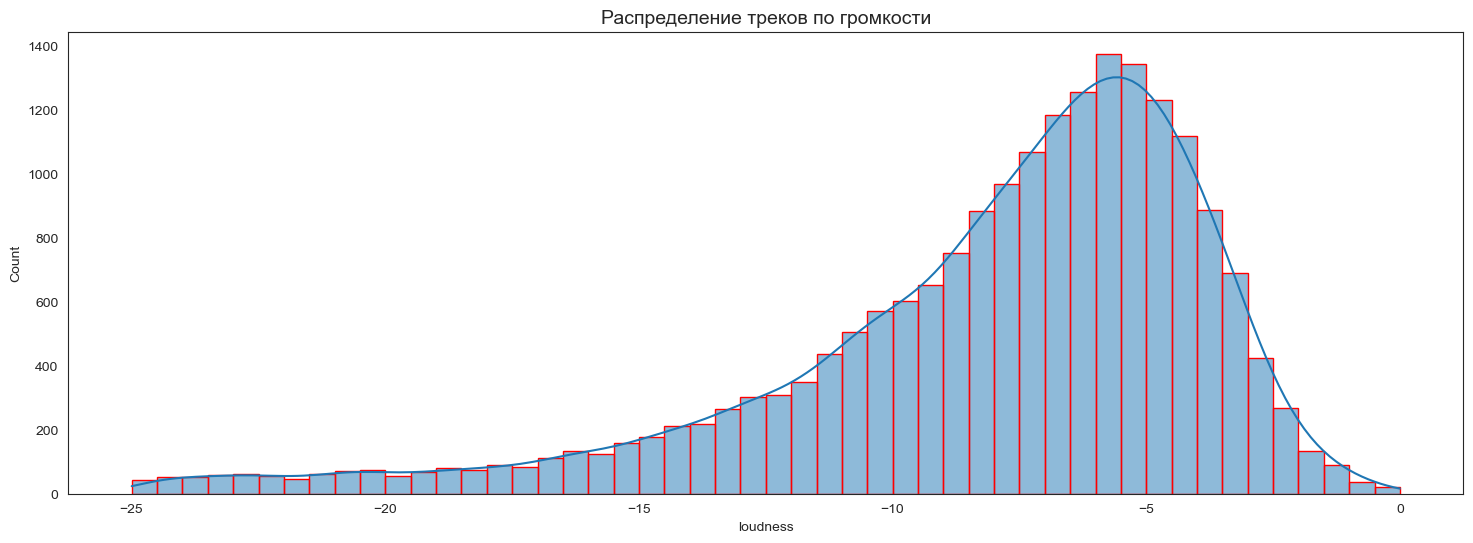

In [36]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(data=df_train,x='loudness', kde=True,bins=50, edgecolor='red', ax=ax)
plt.title('Распределение треков по громкости', fontsize='14')
plt.show()

In [37]:
df_train.groupby('music_genre')['loudness'].mean()

music_genre
Alternative    -6.561434
Anime          -7.264014
Blues          -8.952748
Classical     -17.836029
Country        -7.316007
Electronic     -7.032358
Hip-Hop        -6.828023
Jazz          -11.141769
Rap            -6.649675
Rock           -7.294244
Name: loudness, dtype: float64

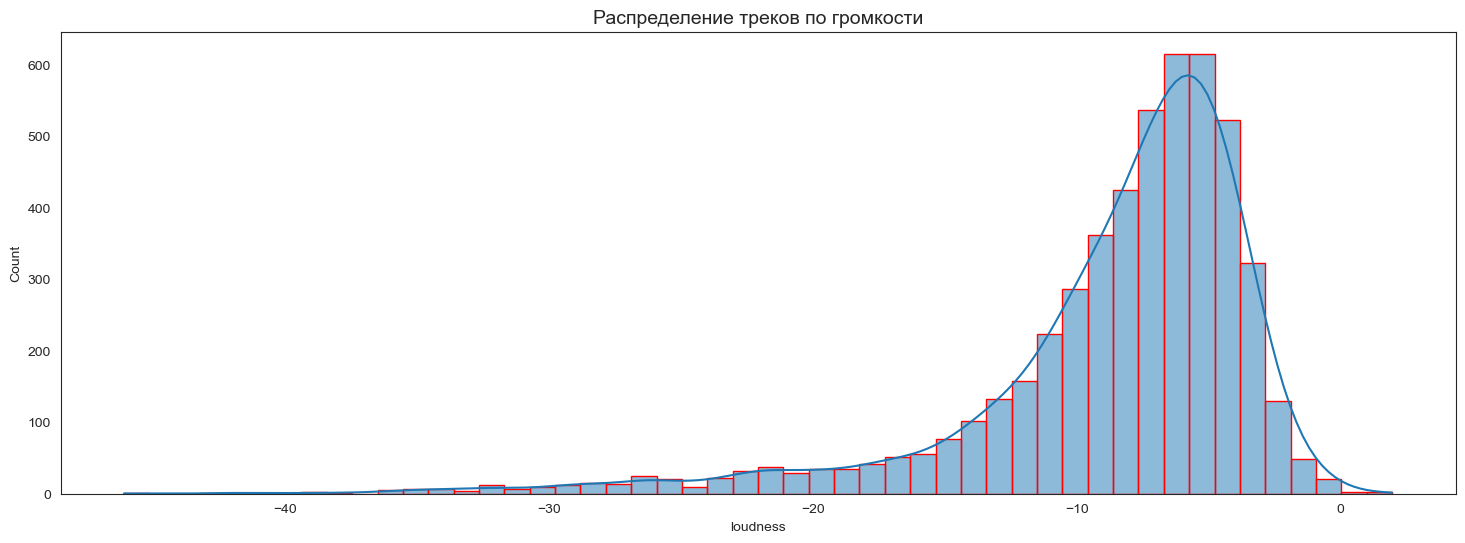

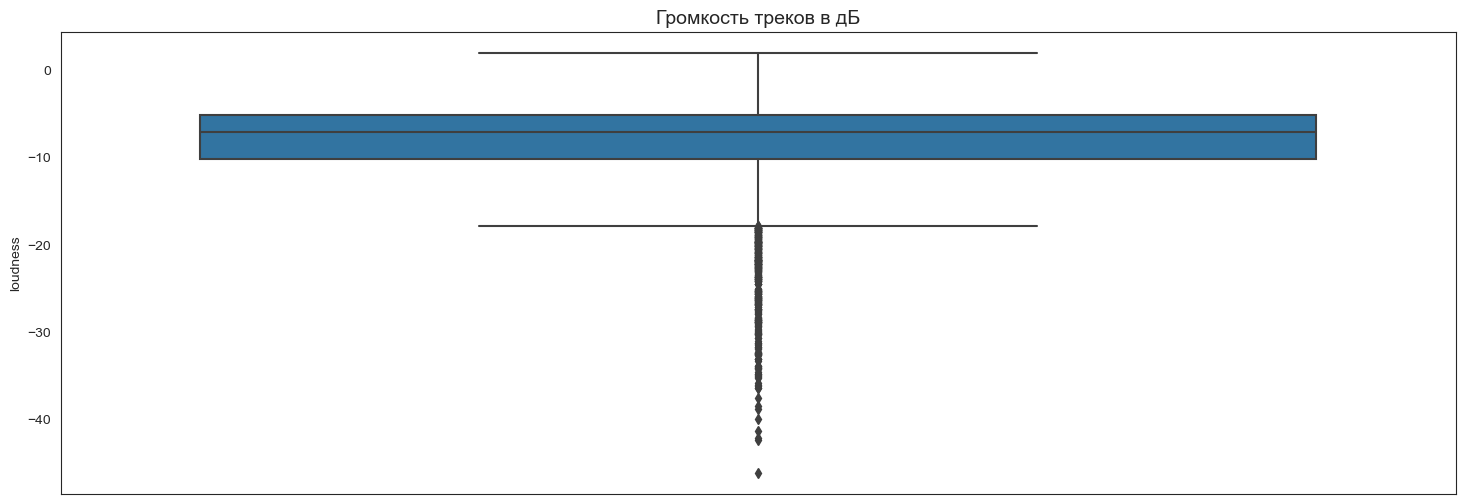

In [38]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(data=df_test,x='loudness', kde=True,bins=50, edgecolor='red', ax=ax)
plt.title('Распределение треков по громкости', fontsize='14')
plt.show()

fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(data=df_test,y='loudness', ax=ax)
plt.title('Громкость треков в дБ', fontsize='14')
plt.show()

In [39]:
df_test.query('loudness<-25').shape[0]

143

In [40]:
df_test.query('loudness>0').shape[0]

5

Удалим треки с громкостью более 0 и менее -25, для сглаживания выбросов c экстремально большими значениями, тем более таких точек менее 1% 

In [41]:
df_test = df_test.query('loudness>-25')

In [42]:
df_test = df_test.query('loudness<0')

Высокую корреляцию столбец имеет по отношению к столбцу energy, возможно для улучшения характеристик обучения в дальнейшем один из признаков потребуется удалить.

####  Определение  инструментальности трека  (instrumentalness)

instrumentalness - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала key - базовый ключ (нота) произведения

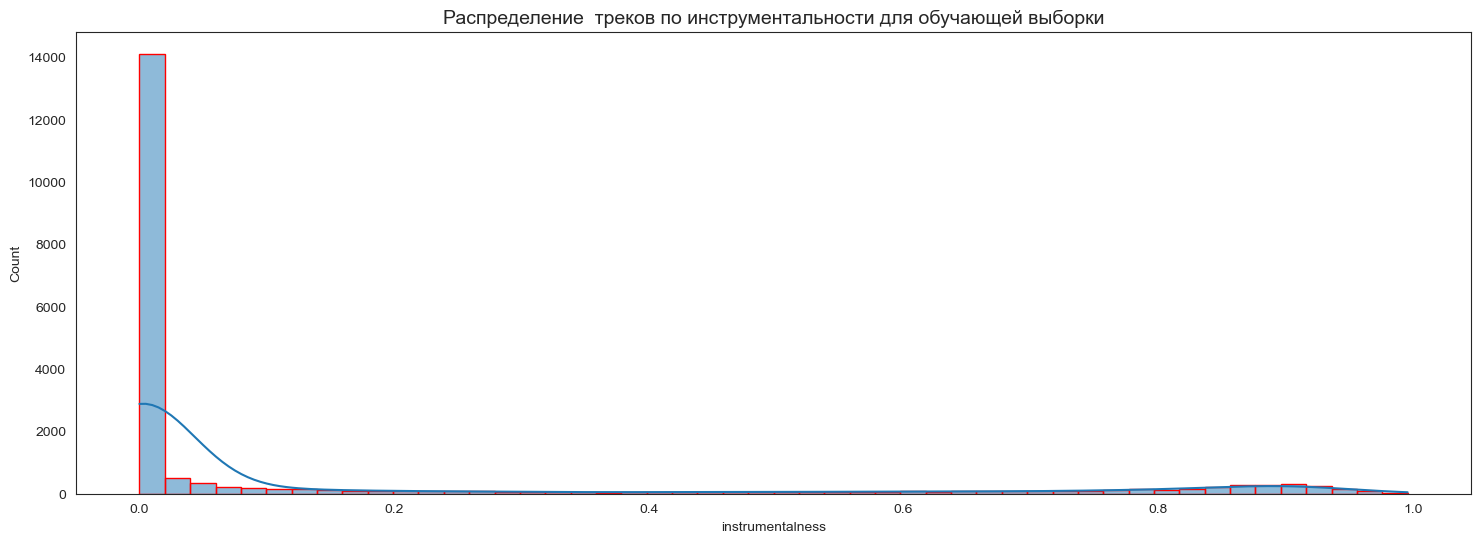

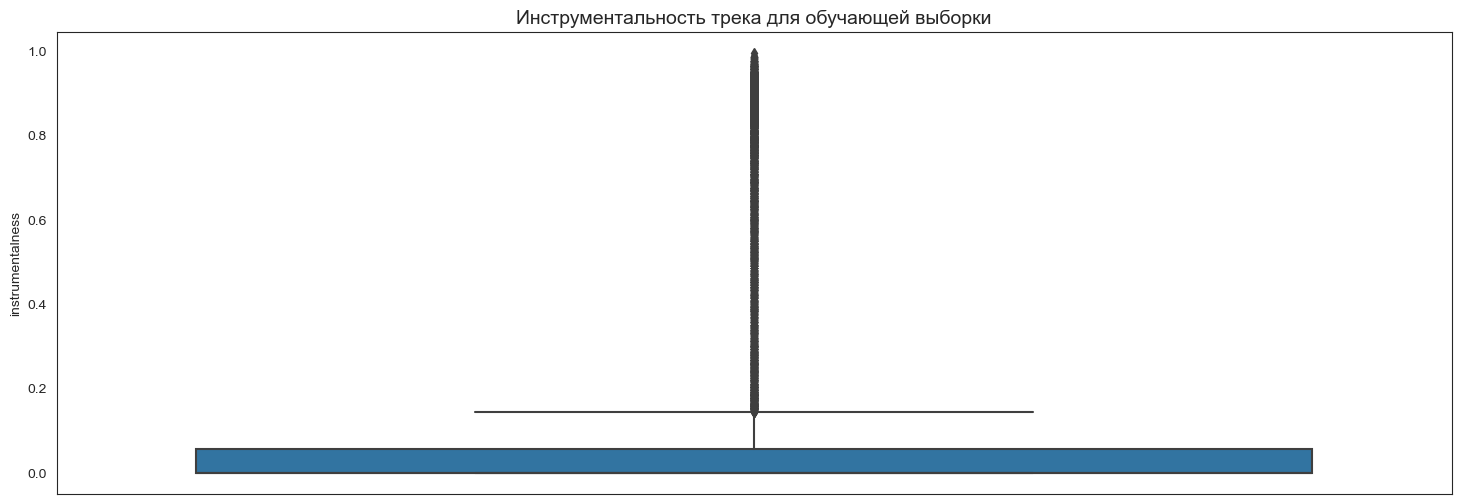

In [43]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(data=df_train,x='instrumentalness', kde=True,bins=50, edgecolor='red', ax=ax)
plt.title('Распределение  треков по инструментальности для обучающей выборки', fontsize='14')
plt.show()

fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(data=df_train,y='instrumentalness', ax=ax)
plt.title('Инструментальность трека для обучающей выборки', fontsize='14')
plt.show()

In [44]:
df_train.groupby('music_genre')['instrumentalness'].mean()

music_genre
Alternative    0.062244
Anime          0.256792
Blues          0.091552
Classical      0.550155
Country        0.005021
Electronic     0.350182
Hip-Hop        0.010034
Jazz           0.360291
Rap            0.008146
Rock           0.054830
Name: instrumentalness, dtype: float64

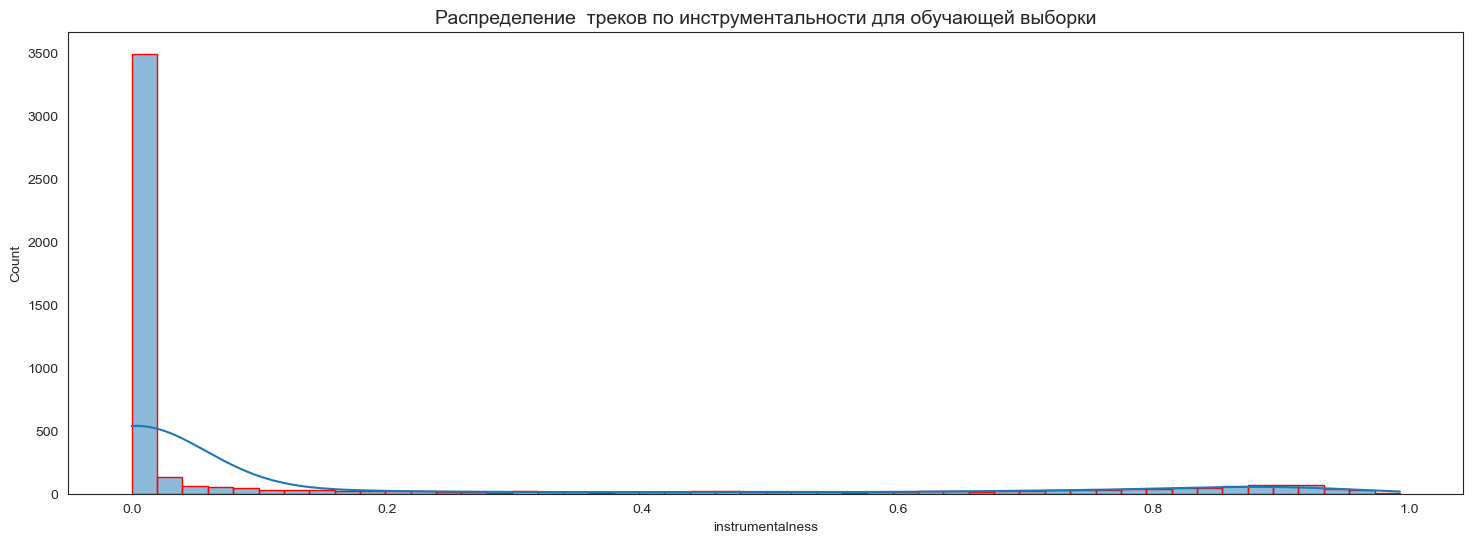

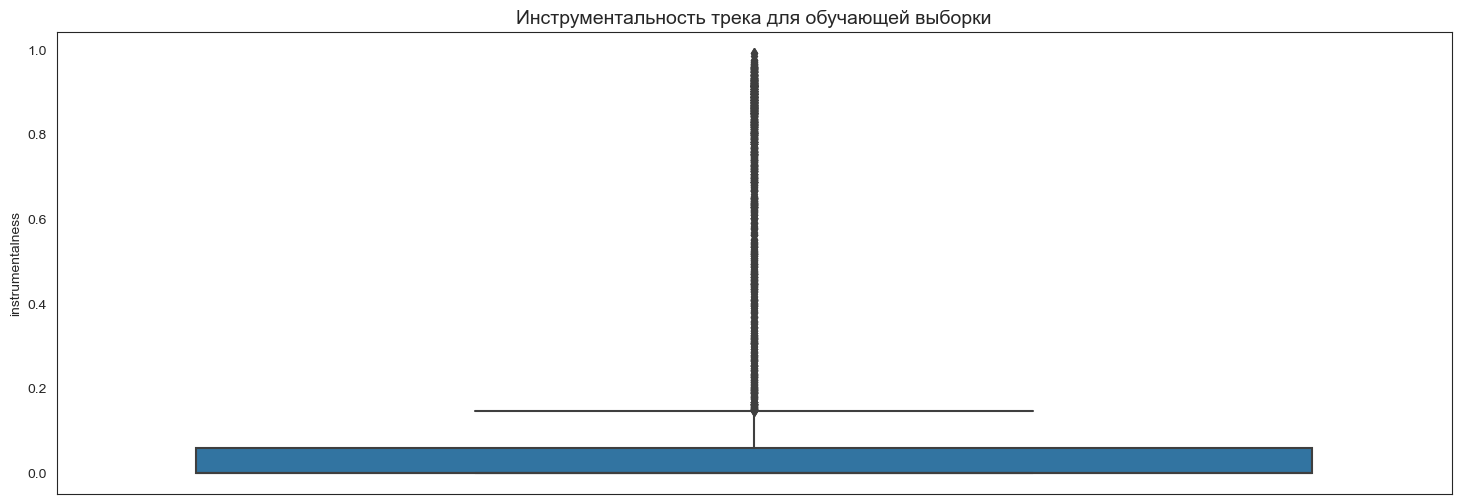

In [45]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(data=df_test,x='instrumentalness', kde=True,bins=50, edgecolor='red', ax=ax)
plt.title('Распределение  треков по инструментальности для обучающей выборки', fontsize='14')
plt.show()

fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(data=df_test,y='instrumentalness', ax=ax)
plt.title('Инструментальность трека для обучающей выборки', fontsize='14')
plt.show()

 В данных нет выбивающихся значений, лежащих за границами усов диаграммы размаха. Все значения лежат в пределах обозначенного диапазона от 0 до 1. Чаще всего инструментальая музыка - классическая и электронная.

In [46]:
df_train.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,19877.000000,19877.000000,19877.000000,19877.000000,19877.000000,19877.000000,19877.000000,19452.000000,19877.000000
mean,0.258044,0.568906,0.639614,0.146548,0.200012,-8.035403,0.092189,121.536853,0.472351
std,0.306579,0.166866,0.236108,0.293149,0.167294,4.379286,0.098208,30.194654,0.240149
min,0.000000,0.060000,0.003100,0.000000,0.013600,-24.989000,0.022300,34.765000,0.025200
25%,0.014400,0.460000,0.486000,0.000000,0.098100,-9.932000,0.035400,96.277000,0.283000
50%,0.111000,0.575000,0.673000,0.000109,0.131000,-6.947000,0.049500,120.069500,0.466000
75%,0.432000,0.686000,0.834000,0.057900,0.256000,-5.019000,0.097900,142.142500,0.658000
max,0.996000,0.978000,0.999000,0.996000,1.000000,-0.003000,0.932000,220.041000,0.992000


####  Позитивность и темп треков 

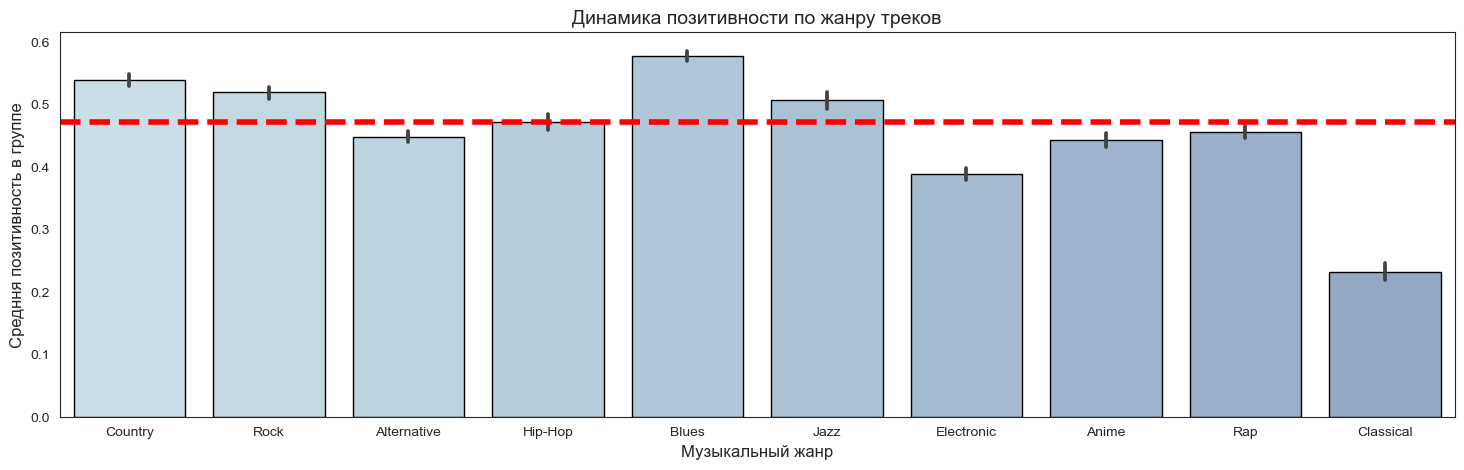

In [47]:
fig, ax = plt.subplots(figsize=(18,5))
sns.barplot(data=df_train, 
            x='music_genre', 
            y ='valence', 
            edgecolor='black', 
            ax=ax, 
            palette=sns.color_palette('ch:s=.25,rot=-.25', 31))
plt.title('Динамика позитивности по жанру треков', fontsize='14')
plt.axhline(y=df_train['valence'].mean(), linewidth=4, color='r', linestyle='--', label='Среднее значение', alpha=1)
plt.xlabel('Музыкальный жанр', fontsize='12')
plt.ylabel('Средння позитивность в группе', fontsize='12')
plt.show()

Посмотрим на распредление треков по темпу

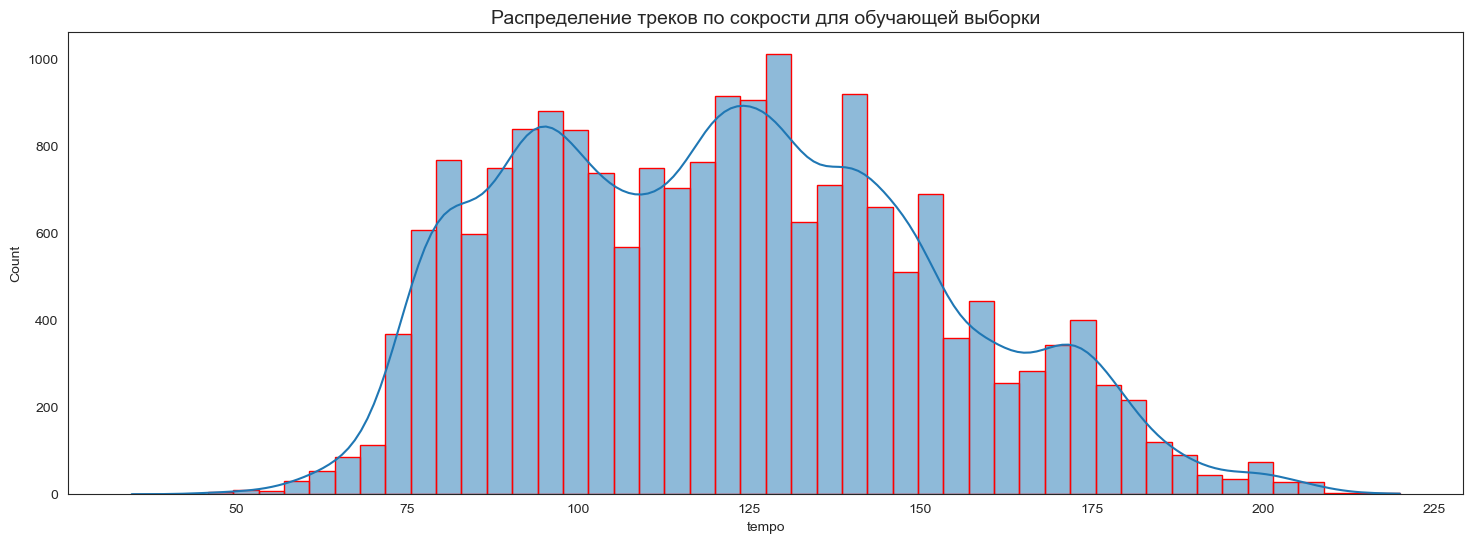

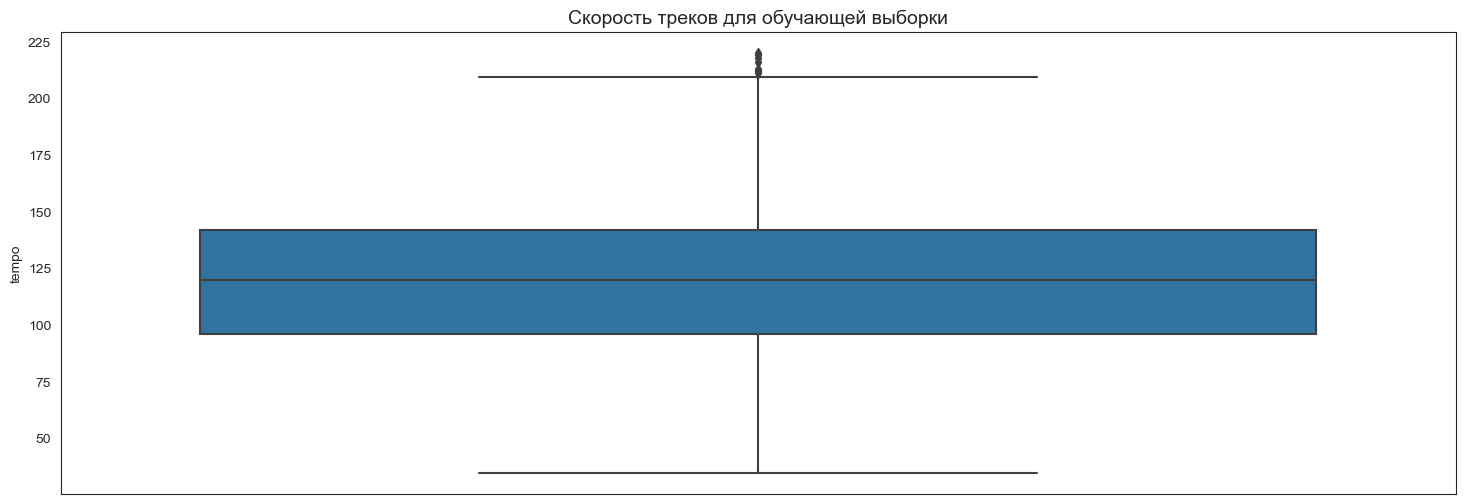

In [48]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(18,6))
sns.histplot(data=df_train,x='tempo', kde=True,bins=50, edgecolor='red', ax=ax)
plt.title('Распределение треков по сокрости для обучающей выборки', fontsize='14')
plt.show()

fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(data=df_train,y='tempo', ax=ax)
plt.title('Скорость треков для обучающей выборки', fontsize='14')
plt.show()

In [49]:
df_train.query('tempo<=40').shape[0]

1

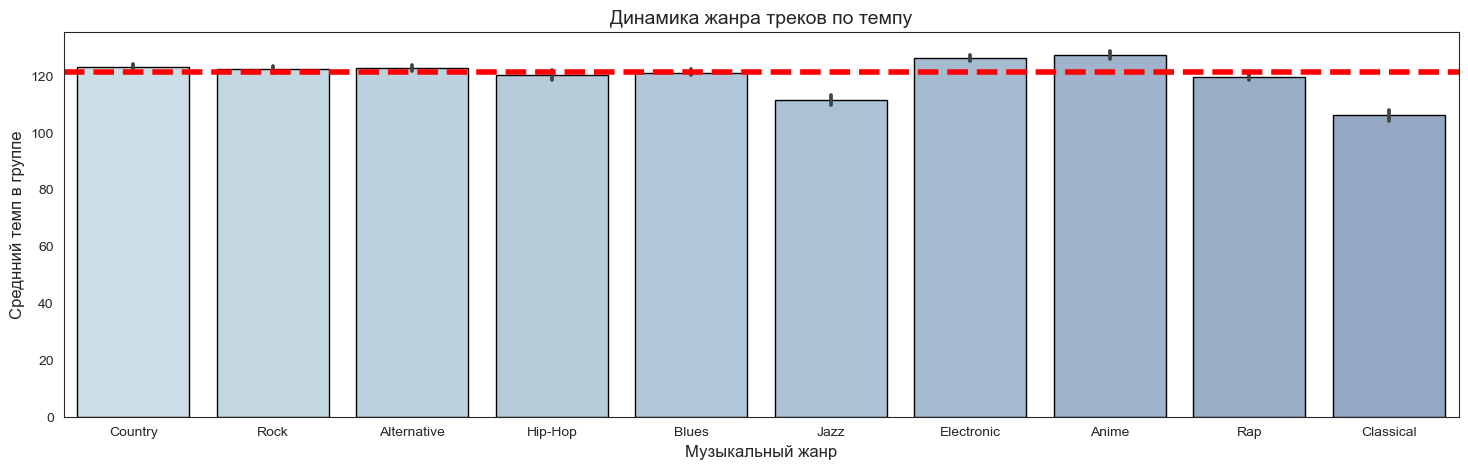

In [50]:
fig, ax = plt.subplots(figsize=(18,5))
sns.barplot(data=df_train, 
            x='music_genre', 
            y ='tempo', 
            edgecolor='black', 
            ax=ax, 
            palette=sns.color_palette('ch:s=.25,rot=-.25', 31))
plt.title('Динамика жанра треков по темпу', fontsize='14')
plt.axhline(y=df_train['tempo'].mean(), linewidth=4, color='r', linestyle='--', label='Среднее значение', alpha=1)
plt.xlabel('Музыкальный жанр', fontsize='12')
plt.ylabel('Среднний темп в группе', fontsize='12')
plt.show()

120 средний ритм музыки разных жанров, что ожидаемо, более танцевальная быстрее, классическая медленнее, что ожидаемо

In [51]:
print('Количество пропусков в столбце tempo составляет', df_train['tempo'].isna().sum())
df_train['tempo'].shape[0]

Количество пропусков в столбце tempo составляет 425


19877

Заполним пропуски, исходя из среднего темпа по жанру музыки.

In [52]:
df_tempo = df_train.pivot_table(
    index=['music_genre'],
    values='tempo',
    aggfunc = 'mean')
df_tempo

,tempo
music_genre,
Alternative,122.949432
Anime,127.521970
Blues,121.341457
Classical,106.216005
Country,123.198516
Electronic,126.400547
Hip-Hop,120.425871
Jazz,111.658631
Rap,119.854293


In [53]:
for x in df_tempo.index:
    df_train.loc[(df_train['tempo'].isna()) & 
             (df_train['music_genre'] == x), 'tempo'] = df_tempo.loc[x,'tempo']

In [54]:
print('Количество пропусков в столбце tempo после обработки составляет', df_train['tempo'].isna().sum())
df_train['tempo'].shape[0]

Количество пропусков в столбце tempo после обработки составляет 0


19877

In [55]:
df_train.isnull().sum()

acousticness          0
danceability          0
energy                0
instrumentalness      0
key                 720
liveness              0
loudness              0
mode                497
speechiness           0
tempo                 0
valence               0
music_genre           0
dtype: int64

## Обучение моделей

Подготовка данных к обучению
Для начала, подготовим данные к обучению:

- разобьём тренировочный данные на признаки и целевой признак
- проведём масштабирование признаков  

Выделим числовые столбцы и категориальные.

In [56]:
cat_cols  = ['key','mode']
num_cols = ['energy',
 'speechiness',
 'instrumentalness',
 'tempo',
 'loudness',
 'danceability',
 'acousticness',
 'liveness',
 'valence']
target_cols=['music_genre']

In [57]:
num_cols

['energy',
 'speechiness',
 'instrumentalness',
 'tempo',
 'loudness',
 'danceability',
 'acousticness',
 'liveness',
 'valence']

In [58]:
# Создание объекта SimpleImputer для категориальных данных
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_train[cat_cols] = categorical_imputer.fit_transform(df_train[cat_cols])
df_test[cat_cols] = categorical_imputer.transform(df_test[cat_cols])

# Создание объекта SimpleImputer для числовых данных 
numerical_imputer = SimpleImputer(strategy='mean')


print(df_train.isnull().sum())
print(df_test.isnull().sum())

acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64
acousticness          0
danceability          0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                  0
speechiness           0
tempo               115
valence               0
dtype: int64


In [59]:
X = df_train.drop('music_genre', axis=1)
y= df_train['music_genre']

Разделим данные на выборки и настроим предобработку методом пайплайн

In [60]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
cat_cols = X.select_dtypes(exclude='number').columns.tolist()
num_cols = X.select_dtypes(include='number').columns.tolist()

num_pipeline = Pipeline(steps=[
    ('impute', IterativeImputer(max_iter=10, random_state=42)),
    ('scale', RobustScaler()),
    ('drop_correlated_features', DropCorrelatedFeatures(threshold=0.8)),
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('drop_constant_features', DropConstantFeatures(tol=0.998))
])

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
], remainder='passthrough')

In [61]:
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('impute',
                                                  IterativeImputer(random_state=42)),
                                                 ('scale', RobustScaler()),
                                                 ('drop_correlated_features',
                                                  DropCorrelatedFeatures()),
                                                 ('polynomial_features',
                                                  PolynomialFeatures()),
                                                 ('drop_constant_features',
                                                  DropConstantFeatures(tol=0.998))]),
                                 ['acousticness', 'danceability', 'energy',
                                  'instrumentalness', 'liveness', 'loudness',
                                  'speechiness', 'tempo', 'valence'])

### Обучим модель методом RandomForestClassifier

In [62]:
model = RandomForestClassifier(random_state=42)
pipeline = make_imblearn_pipeline(col_trans, model)

In [63]:
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('scale',
                                                                   RobustScaler()),
                                                                  ('drop_correlated_features',
                                                                   DropCorrelatedFeatures()),
                                                                  ('polynomial_features',
                                                                   PolynomialFeatures()),
                                                                  ('drop_constant_features',
                                  

In [64]:
pipeline.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('scale',
                                                                   RobustScaler()),
                                                                  ('drop_correlated_features',
                                                                   DropCorrelatedFeatures()),
                                                                  ('polynomial_features',
                                                                   PolynomialFeatures()),
                                                                  ('drop_constant_features',
                                  

In [65]:
prediction = pipeline.predict(X_test)

In [66]:
prediction

array(['Alternative', 'Blues', 'Alternative', ..., 'Electronic', 'Rap',
       'Alternative'], dtype=object)

In [67]:
# Оценка точности модели
accuracy = accuracy_score(y_test, prediction)

In [68]:
accuracy

0.41297786720321933

In [69]:
result_f1 = f1_score(y_test, prediction,average='micro')

In [70]:
result_f1

0.41297786720321933

In [71]:
df_results = pd.DataFrame({'Название':['RandomForestClassifier'],
                          'F1 micro': [result_f1]})

In [72]:
df_results

,Название,F1 micro
0,RandomForestClassifier,0.412978


Метрика показала неплохой результат проведем улучшение подбором гиперпараметров

In [73]:
# Определение гиперпараметров для Random Forest с помощью RandomizedSearchCV
param_dist = {'n_estimators': [200], 'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [20], 'min_samples_split': [10], 'min_samples_leaf': [2], 'bootstrap': [True, False]}

# Создание и обучение модели RandomForestClassifier с использованием RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1)
pipeline_1 = make_imblearn_pipeline(col_trans, rf_random)

pipeline_1.fit(X, y)

# Предсказание на тестовом наборе
prediction_rf = pipeline_1.predict(X_test)

In [74]:
# Оценка точности модели
accuracy_rf_1 = accuracy_score(y_test, prediction_rf)
print(f'Accuracy: {accuracy}')

Accuracy: 0.41297786720321933


In [75]:
result_f1_1 = f1_score(y_test, prediction_rf,average='micro')
print(result_f1_1)

0.4192655935613682


Метрика улучшилась после подбора гиперпараметров

In [76]:
df_results.loc[len(df_results.index)] = ['RandomForestClassifier+RandomizedSearchCV',
                                        result_f1_1]

In [77]:
df_results

,Название,F1 micro
0,RandomForestClassifier,0.412978
1,RandomForestClassifier+RandomizedSearchCV,0.419266


### Модель Catboost

In [91]:
params_catboost = {
            'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
            'depth': np.arange(2, 20,1),
            'l2_leaf_reg': np.arange(2, 10,1),
             'iterations'    : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
         }

In [92]:
catboost = CatBoostClassifier(loss_function='MultiClass')

In [93]:
model_catboost  = RandomizedSearchCV(catboost, params_catboost,
                                     n_jobs=-1, cv=5, scoring='f1_micro')

In [94]:
pipeline_catboost = make_imblearn_pipeline(col_trans, model_catboost)

In [95]:
pipeline_catboost.fit(X, y)

0:	learn: 2.2301948	total: 6.13s	remaining: 7m 2s
1:	learn: 2.1686804	total: 11.6s	remaining: 6m 34s
2:	learn: 2.1145099	total: 17.7s	remaining: 6m 34s
3:	learn: 2.0701039	total: 23.7s	remaining: 6m 31s
4:	learn: 2.0211865	total: 29.6s	remaining: 6m 25s
5:	learn: 1.9762025	total: 35.5s	remaining: 6m 18s
6:	learn: 1.9374007	total: 41.5s	remaining: 6m 13s
7:	learn: 1.9087009	total: 47.5s	remaining: 6m 8s
8:	learn: 1.8771294	total: 53.4s	remaining: 6m 2s
9:	learn: 1.8486698	total: 59.5s	remaining: 5m 56s
10:	learn: 1.8199494	total: 1m 5s	remaining: 5m 51s
11:	learn: 1.7971193	total: 1m 11s	remaining: 5m 46s
12:	learn: 1.7703280	total: 1m 17s	remaining: 5m 39s
13:	learn: 1.7476413	total: 1m 23s	remaining: 5m 33s
14:	learn: 1.7253749	total: 1m 29s	remaining: 5m 27s
15:	learn: 1.7058924	total: 1m 35s	remaining: 5m 21s
16:	learn: 1.6865926	total: 1m 41s	remaining: 5m 16s
17:	learn: 1.6677032	total: 1m 47s	remaining: 5m 10s
18:	learn: 1.6518943	total: 1m 53s	remaining: 5m 4s
19:	learn: 1.63393

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('scale',
                                                                   RobustScaler()),
                                                                  ('drop_correlated_features',
                                                                   DropCorrelatedFeatures()),
                                                                  ('polynomial_features',
                                                                   PolynomialFeatures()),
                                                                  ('drop_constant_features',
                                  

In [96]:
# Предсказание на тестовом наборе
prediction_catboos = pipeline_catboost.predict(X_test)

In [97]:
# Оценка точности модели
accuracy_rf = accuracy_score(y_test, prediction_catboos)
print(f'Accuracy: {accuracy}')

Accuracy: 0.41297786720321933


In [98]:
result_f1_2 = f1_score(y_test, prediction_catboos,average='micro')
print(result_f1_2)

0.42655935613682094


In [99]:
df_results.loc[len(df_results.index)] = ['CatBoostClassifier+RandomizedSearchCV',
                                        result_f1_2]

In [100]:
df_results

,Название,F1 micro
0,RandomForestClassifier,0.412978
1,RandomForestClassifier+RandomizedSearchCV,0.419266
2,CatBoostClassifier+RandomizedSearchCV,0.439386
3,CatBoostClassifier+RandomizedSearchCV,0.426559


In [101]:
# Выводим лучшие параметры
print("Лучшие гиперпараметры:", model_catboost.best_params_)

Лучшие гиперпараметры: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 70, 'depth': 12}


In [102]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Отчет о качестве предсказания лучшей модели

#### CatBoostClassifier
Гиперпараметры:
 - 'learning_rate': 0.1, 
 - 'l2_leaf_reg': 5, 
 - 'iterations': 70, 
 - 'depth': 12

Оценка качества:
 * F1: 0.439

По результатам работы:
 - проведен  анализ важности признаков для прогнозирования 
 - проведена предобработка данных
 - Модель обучена двумя методами Random forest и CatBoostClassifier
 - проведен подбор гиперпараметров для модели CatBoostClassifier и Random forest